### Fashion MNIST data set classification using Neural Nets

## Image categories
<img src="imgs/fashion.png"
     style="float: left; margin-right: 1px;" width="500" height="400" />

In [1]:
#Import the required libraries
import numpy as np
np.random.seed(1338)

from keras.datasets import fashion_mnist

G:\anaconda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

## Loading data

In [4]:
# Load the training and testing data
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
# Display purpose:
X_train_orig = X_train
X_test_orig = X_test

4423680/4422102 [==============================] - 5s 1us/step


## Data preparation

In [5]:
from keras import backend as K
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)
    

## Pre process and normalize data

In [6]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

## Looking at some images

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

[9 0 0 3 0 2 7 2 5 5]


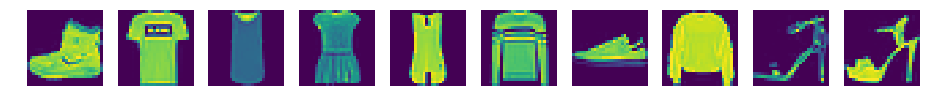

In [8]:
print(Y_train[0:10])

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    plt.axis('off')

In [9]:
item_label_mapping = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

### Print items with the labels

['Ankle Boot', 'T-shirt/Top', 'T-shirt/Top', 'Dress', 'T-shirt/Top', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal']


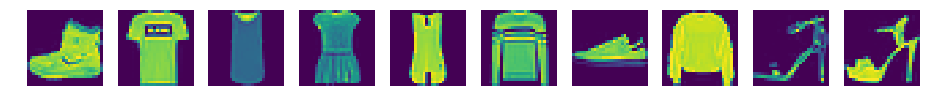

In [10]:
first_10_train_item_labels = [item_label_mapping[index] for index in Y_train[0:10]]
print(first_10_train_item_labels)

slice = 10
plt.figure(figsize=(16,8))
for i in range(slice):
    plt.subplot(1, slice, i+1)
    plt.imshow(X_train_orig[i], interpolation='nearest')
    plt.axis('off')